In [2]:
import pennylane as qml
from pennylane import numpy as np
from dotenv import load_dotenv
import os
# import csv
# import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime


In [11]:
# Load environment variables
load_dotenv()
HOST_ENV = os.getenv("HOST")
USER_ENV = os.getenv("USER")
ACCESS_TOKEN_ENV = os.getenv("ACCESS_TOKEN")
REALM_ENV = os.getenv("REALM")

s = '110'
n_qubits = len(s)

num_shots = 1000


# Real device for measured result
dev_sf = qml.device(
    "monarq.default",
    wires=n_qubits+1,
    shots=num_shots,
    host=HOST_ENV,
    user=USER_ENV,
    access_token=ACCESS_TOKEN_ENV,
    project_name="",
    #realm=REALM_ENV,
)



@qml.qnode(dev_sf)
def bernstein_vazirani(s):
    # Étapes 1-2: Initialisation et superposition
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    qml.PauliX(wires=n_qubits)
    qml.Hadamard(wires=n_qubits)

    # Étape 3 : Application de l'oracle pour la chaîne binaire s
    for i in range(n_qubits):
        if s[i] == '1':
            qml.CNOT(wires=[i, n_qubits])

    # Étape 4 : Transformation Hadamard
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    # Étape 5 : Mesure des qubits d'entrée
    return qml.counts(wires=range(n_qubits))



# Exécuter le circuit avec la chaîne binaire s
result = bernstein_vazirani(s)
print(bernstein_vazirani.tape.wires)



Wires([0, 1, 2, 3])


In [14]:
from pennylane_snowflurry.transpiler.transpiler_config import TranspilerConfig, MonarqDefaultConfig
from pennylane_snowflurry.transpiler.steps.base_decomposition import CliffordTDecomposition
from pennylane_snowflurry.transpiler.steps.routing import Swaps
from pennylane_snowflurry.transpiler.steps.optimization import IterativeCommuteAndMerge
from pennylane_snowflurry.transpiler.steps.native_decomposition import MonarqDecomposition

# Load environment variables
load_dotenv()
HOST_ENV = os.getenv("HOST")
USER_ENV = os.getenv("USER")
ACCESS_TOKEN_ENV = os.getenv("ACCESS_TOKEN")
REALM_ENV = os.getenv("REALM")

s = '110'
n_qubits = len(s)

num_shots = 1000

config = MonarqDefaultConfig()

# Real device for measured result
dev_sf = qml.device(
    "monarq.default",
    wires=n_qubits+1,
    shots=num_shots,
    host=HOST_ENV,
    user=USER_ENV,
    access_token=ACCESS_TOKEN_ENV,
    project_name="",
    behaviour_config=config
    #realm=REALM_ENV,
)

my_qubits = [4,0,1,8]

@qml.qnode(dev_sf)
def bernstein_vazirani(s):
    # Étapes 1-2: Initialisation et superposition
    for i in my_qubits[:3]:
        qml.Hadamard(wires=i)

    qml.PauliX(wires=my_qubits[n_qubits - 1])
    qml.Hadamard(wires=my_qubits[n_qubits - 1])

    # Étape 3 : Application de l'oracle pour la chaîne binaire s
    for i, w in enumerate(my_qubits[:3]):
        if s[i] == '1':
            qml.CNOT(wires=[w, my_qubits[n_qubits - 1]])

    # Étape 4 : Transformation Hadamard
    for i in my_qubits:
        qml.Hadamard(wires=i)

    # Étape 5 : Mesure des qubits d'entrée
    return qml.counts(wires=my_qubits[:3])



# Exécuter le circuit avec la chaîne binaire s
result = bernstein_vazirani(s)
print(bernstein_vazirani.tape.wires)




KeyboardInterrupt: 

[IPKernelApp] ERROR | Exception in control handler:
Traceback (most recent call last):
  File "C:\Users\bouch\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 362, in process_control
    await result
  File "C:\Users\bouch\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 1039, in debug_request
    reply_content = await reply_content
                    ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bouch\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 533, in do_debug_request
    return await self.debugger.process_request(msg)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bouch\AppData\Roaming\Python\Python312\site-packages\ipykernel\debugger.py", line 735, in process_request
    reply = await handler(message)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bouch\AppData\Roaming\Python\Python312\site-packages\ipykernel\debugger.py", line 561, in variables
    var for var in reply["bod

In [13]:
print(result)

{'000': 91, '001': 64, '010': 168, '011': 64, '100': 152, '101': 69, '110': 307, '111': 85}


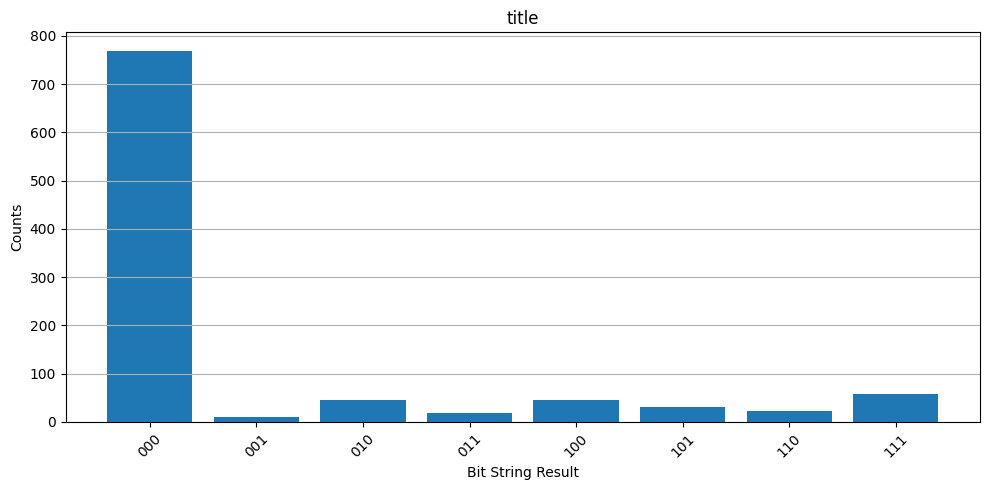

In [9]:
labels = list(result.keys())
values = list(result.values())

plt.figure(figsize=(10, 5))
plt.bar(labels, values)
plt.xlabel('Bit String Result')
plt.ylabel('Counts')
plt.title('title')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()